<a href="https://colab.research.google.com/github/RobJavVar/DataSciencePsychNeuro/blob/master/ExerciseSubmissions/07_linear-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework datasets/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [9]:
# If you are running this on your local computer, wet your workign directory to
# the location of the lexDat data by setting your harddrive. Uncomment this line
# and change the location to where it is on your computer.
setwd("/Users/Ali/Documents/GitHub/DataSciencePsychNeuro/Exercise datasets/hcp_data")
library(tidyverse)
df <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

# INSERT CODE HERE

d1 <- df %>%
select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
drop_na()

head(d1)

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100206,M,130.42,543134,807245
2,100307,F,112.56,407292,664124
3,100408,M,121.18,500417,726206
4,100610,M,126.53,512946,762308
5,101006,F,101.85,429449,579632
6,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

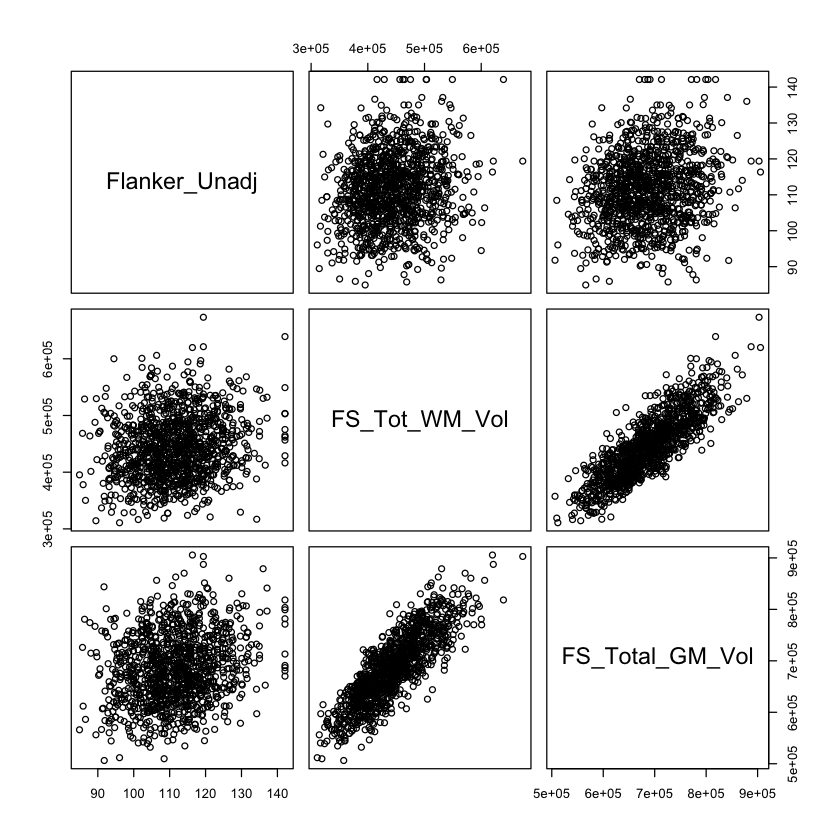

In [12]:
#INSERT CODE HERE
pairs(~ Flanker_Unadj +
        FS_Tot_WM_Vol + FS_Total_GM_Vol, data = d1)


In [ ]:
> *Write your response here.*
>Grey and white matter volume appear to have a strong positive correlation. 
Flanker task performance does not appear to have a strong correlation with either white
or grey matter volume, although there may be a weaker positive correlation between these variables. 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [18]:
#INSERT CODE HERE

model_Task_Grey <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(model_Task_Grey)

coef(model_Task_Grey)
confint(model_Task_Grey)



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> *Write your response here.*
>Yes, grey matter volume is significantly associated with flanker task performance (B0= 90.26, B1=3.11x10^-5, 95% CI [2.24x10^-5, 3.98x10^-5], p<.001).
> Higher grey matter volume is associated with higher flanker task performance. 
> The model explained only 4.3% of the variance in grey matter volume. 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see.

`geom_smooth()` using formula = 'y ~ x'


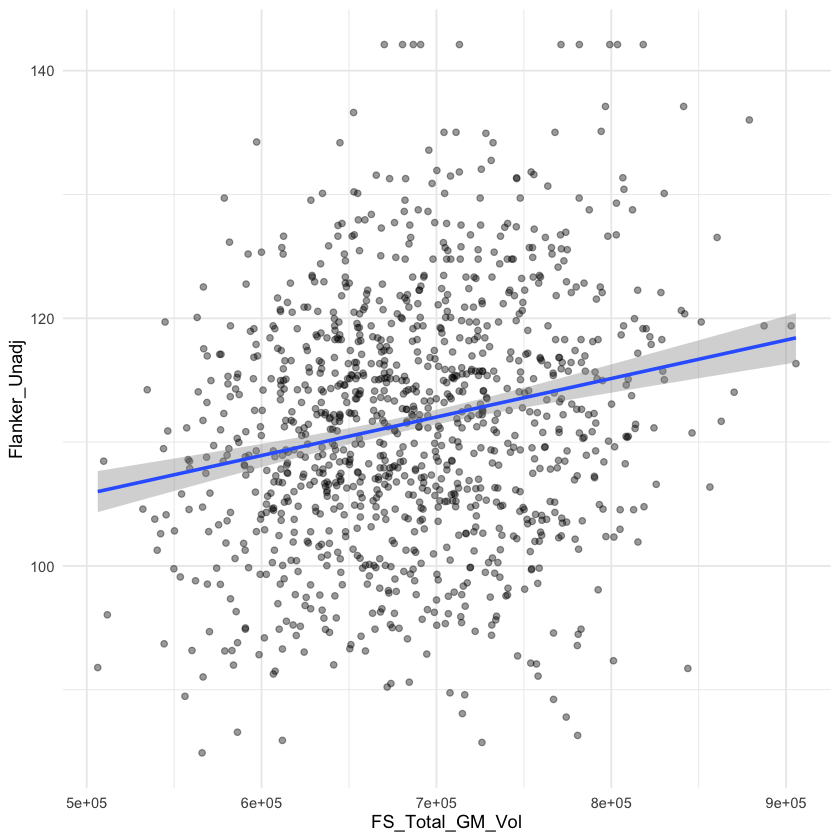

In [17]:
#INSERT CODE HERE
library(ggplot2)

ggplot(d1, aes(x=FS_Total_GM_Vol, y=Flanker_Unadj)) +
  geom_point(alpha=0.4) +
  geom_smooth(method="lm", se=TRUE) +
  theme_minimal()


> *Write your response here.*
>

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> *Write your response here.*
>There is a positive association between flanker task performance and total grey matter volume, such that higher gray matter volume is associated with higher flanker task performance. However, there is high variability in this association and a low amount of variance in flanker task performance explained by this model. Grey matter volume only account for a small amount of the variance in flanker task performacnce. The CI is narrow and does not include 0, which reflects the significant association and also probably the larger sample size. 

**DUE:** 5pm EST, Feb 19, 2026

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*